In [1]:
# packages for analysis 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#package for visual
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import seaborn as sns

#Allows charts to appear in the notebook
%matplotlib inline

#pickle package
import pickle

# operating system
import os
os.getcwd()

'C:\\Users\\ISAAC'

In [187]:
# Reading data from excel  "sp=students performance"
HR=pd.read_excel("HR Employee Dataset.xlsx")

In [188]:
HR.head()   # MSc=1, BSc=2, HND=3, OND=4

,Age,Education_Level,No_Companies_Worked,Total_Working_Years,Years_At_Company,Monthly_Income
0,41,HND,8,8,6,5993
1,49,MSc,1,10,10,5130
2,37,HND,6,7,0,2090
3,33,MSc,1,8,8,2909
4,27,OND,9,6,2,3468


In [189]:
HR.tail()

,Age,Education_Level,No_Companies_Worked,Total_Working_Years,Years_At_Company,Monthly_Income
111,29,MSc,1,10,10,9980
112,32,HND,0,7,6,3298
113,22,HND,1,1,1,2935
114,53,MSc,2,31,25,15427
115,30,OND,1,1,1,2693


In [208]:
HR.Education_Level.replace(['OND', 'HND', 'BSc', 'MSc'], ['4', '3','2', '1'], inplace=True)

In [210]:
 HR.info() # Checking missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  116 non-null    int64  
 1   Education_Level      116 non-null    object 
 2   No_Companies_Worked  116 non-null    int64  
 3   Total_Working_Years  116 non-null    int64  
 4   Years_At_Company     116 non-null    int64  
 5   Monthly_Income       116 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 5.6+ KB


In [194]:
#treating Outliers (capping and flooring)

lower_limit = HR['Monthly_Income'].mean()-1*HR['Monthly_Income'].std()
print(lower_limit)

upper_limit = HR['Monthly_Income'].mean() + 1*HR['Monthly_Income'].std()
print(upper_limit)

1487.1296470449015
7101.112190345311


In [195]:
HR['Monthly_Income']=np.where(HR['Monthly_Income'] > upper_limit,                        
upper_limit, np.where(HR['Monthly_Income']<lower_limit,
lower_limit, HR['Monthly_Income']))

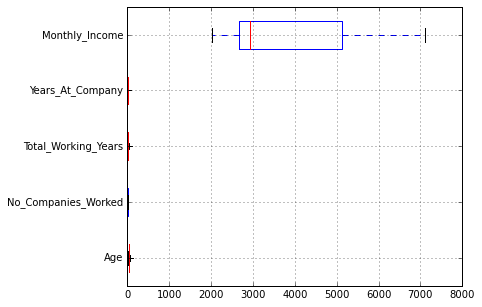

In [196]:
# Outlier Checks
plt.figure(figsize=(6,5))
HR.boxplot(vert=0)
plt.show()

In [197]:
HR.describe()

,Age,No_Companies_Worked,Total_Working_Years,Years_At_Company,Monthly_Income
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,34.181034,2.172414,8.172414,5.758621,3799.679268
std,8.104319,2.770264,5.978623,4.803297,1635.931667
min,22.000000,0.000000,1.000000,0.000000,2028.000000
25%,29.000000,0.000000,5.000000,2.000000,2670.000000
50%,32.000000,1.000000,7.000000,5.000000,2935.000000
75%,36.000000,4.000000,10.000000,8.000000,5130.000000
max,59.000000,9.000000,31.000000,25.000000,7101.112190


In [198]:
HR.corr()

,Age,No_Companies_Worked,Total_Working_Years,Years_At_Company,Monthly_Income
Age,1.000000,0.105884,0.605231,0.347596,0.258589
No_Companies_Worked,0.105884,1.000000,0.211875,-0.188319,0.034878
Total_Working_Years,0.605231,0.211875,1.000000,0.820849,0.641065
Years_At_Company,0.347596,-0.188319,0.820849,1.000000,0.710818
Monthly_Income,0.258589,0.034878,0.641065,0.710818,1.000000


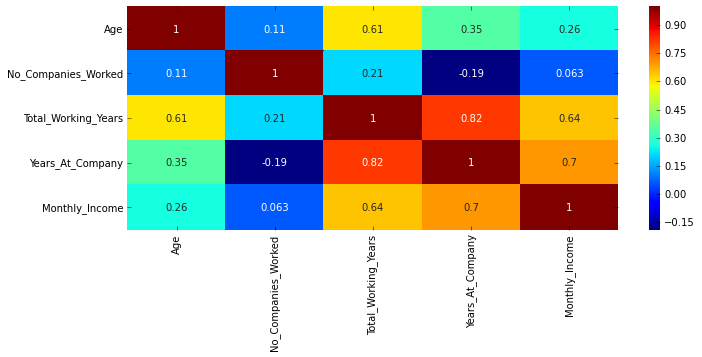

In [95]:
#Correlation plot
plt.figure(figsize=(11,4))
sns.heatmap(HR.corr(), cmap="jet", annot=True)
plt.show()

Checking for the data distribution

<Figure size 432x216 with 0 Axes>

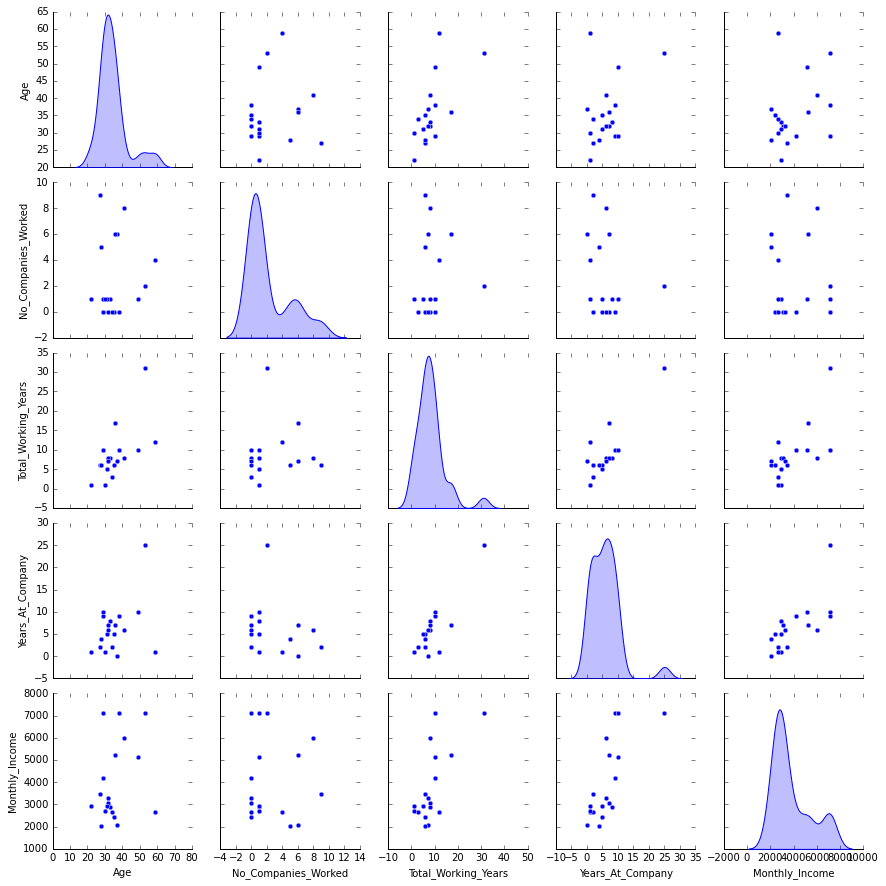

In [199]:
# plotting our data (pairwise relationship)
plt.figure(figsize=(6,3))
sns.pairplot(HR, diag_kind='kde')     # Kernel Distribution Estimate
plt.show()

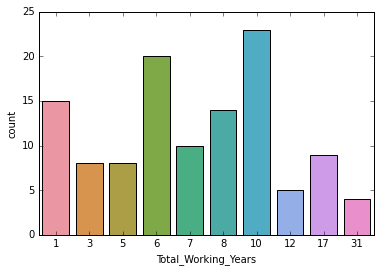

In [46]:
#Count plot for Employee Total Working Years 
sns.countplot(x='Total_Working_Years', data=HR)
plt.show()

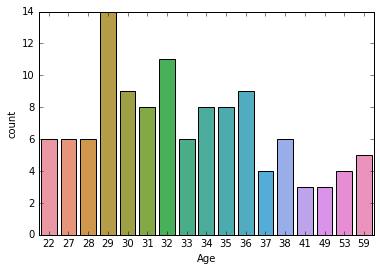

In [47]:
#Count plot for Employee Total Working Years
sns.countplot(x='Age', data=HR)
plt.show()

In [212]:
# define the features and the target

X=HR.drop('Monthly_Income', axis=1) # dropping Monthly Income ($)
y=HR['Monthly_Income']

In [213]:
X

,Age,Education_Level,No_Companies_Worked,Total_Working_Years,Years_At_Company
0,41,3,8,8,6
1,49,1,1,10,10
2,37,3,6,7,0
3,33,1,1,8,8
4,27,4,9,6,2
...,...,...,...,...,...
111,29,1,1,10,10
112,32,3,0,7,6
113,22,3,1,1,1
114,53,1,2,31,25


In [202]:
y

0      5993.00000
1      5130.00000
2      2090.00000
3      2909.00000
4      3468.00000
          ...    
111    7101.11219
112    3298.00000
113    2935.00000
114    7101.11219
115    2693.00000
Name: Monthly_Income, Length: 116, dtype: float64

In [214]:
#================split X and y into training and test set in 75:25 ratio==============================#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=1) 


Linear Regression Model

In [215]:
# Invoke the linear Regression function and find the best fit model on training data
regression_model=LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [216]:
# Let's explore the coefficient for each of the explanatory (independent) attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {:.3f}".format(col_name, regression_model.coef_[idx]))

The coefficient for Age is 3.159
The coefficient for Education_Level is -3.816
The coefficient for No_Companies_Worked is 152.362
The coefficient for Total_Working_Years is -7.357
The coefficient for Years_At_Company is 275.323


In [220]:
# Let's check the intercept for the model

intercept=regression_model.intercept_
print("The intercept for the model is {:.3f}".format(intercept))

The intercept for the model is 1821.147


In [221]:
# R square on training data

regression_model.score(X_train, y_train)

0.5206669326185821

coefficient of determination of 0.52 means that "52% of the the total variation in the response variable is explained by the pedictors in the regression model". Thus this is pretty fair model.

In [222]:
# R square on testing data
regression_model.score(X_test, y_test)



0.5434609396985823

# LINEAR REGRESSION USING STATS MODEL

In [223]:
# concatenate X and y into a single dataframe
data_train=pd.concat([X_train, y_train], axis=1)

In [224]:
data_train.columns

Index(['Age', 'Education_Level', 'No_Companies_Worked', 'Total_Working_Years',
       'Years_At_Company', 'Monthly_Income'],
      dtype='object')

In [225]:
expression='Monthly_Income ~ Age + Education_Level +  No_Companies_Worked + Total_Working_Years +  Years_At_Company'

In [226]:
#building linear regression using ols ()

import statsmodels.formula.api as smf
lml=smf.ols(formula=expression, data=data_train).fit ()

In [227]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:         Monthly_Income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     12.46
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.20e-10
Time:                        10:14:53   Log-Likelihood:                -730.94
No. Observations:                  87   AIC:                             1478.
Df Residuals:                      79   BIC:                             1498.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1532.6265 

In [231]:
# Calculate MSE
import math
mse=np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

1223.394733106348

In [232]:
# prediction on the test data
y_pred=regression_model.predict(X_test)

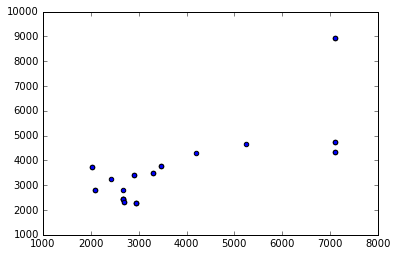

In [236]:
plt.scatter(y_test, y_pred)
plt.show()


# Conclusion

The final multiple linear regression equation is

Monthly Income($)= 1532.627 + 375.50 Edu_Level_BSc_Holder + 199.471 Edu_Level_HND_Holder + 142.552 Edu_Level_OND_Holder + 4.371 Age + 165.827 No_of_Companies_Worked + (-33.134) Total_Working_Years + 311.019 Years_at_Company

When BSc holder increases by 1 unit, monthly income increases by 375.50 units, keeping all other predictors constatnt.
similarly, when Age increases by 1 unit, monthly income increases by 4.371 units, while other predictors are constant.

There is also a negative co-efficient values, for instance, total working years has its corresponding co-efficient as -33.134. 
This implies that, when total working years increases by 1 units, then monthly income decreases by 33.134 units, keeping all other predictors constatnt.

